In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tqdm

In [2]:
file = open('./data/shashlik_61_pulses.txt', 'r')
data = file.readlines()
data = np.array([list(map(float, experiment.split())) for experiment in data])

In [3]:
data.shape

(7848, 1026)

In [4]:
print("Experiments number:", data.shape[0])

Experiments number: 7848


In [5]:
y = data[:, 0]
y_baseline = data[:, 1]
X = data[:, 2:]

### Normalize y

In [6]:
y = y - np.mean(y)

In [7]:
y_baseline = y_baseline - np.mean(y_baseline)

### Model

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.preprocessing import PolynomialFeatures

In [57]:
def print_lr_scores(X, reg=LinearRegression()):
    scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
    scores = cross_validate(reg, X, y, scoring=scoring, cv=5)
    
    print("95% confindence interval:")
    print("r2_score: %0.5f (+/- %0.5f)" % (scores['test_r2'].mean(), scores['test_r2'].std() * 2))
    print("MSE: %0.5f (+/- %0.5f)" % (-scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std() * 2))
    print("MAE: %0.5f (+/- %0.5f)" % (-scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std() * 2))

#### Linear regression metrics

In [10]:
print_lr_scores(X)

95% confindence interval:
r2_score: 0.99904 (+/- 0.00008)
MSE: 0.15693 (+/- 0.01474)
MAE: 0.30628 (+/- 0.01495)


#### Baseline metrics

In [11]:
print("r2_score:", r2_score(y, y_baseline))
print("MSE:", mean_squared_error(y, y_baseline))
print("MAE:", mean_absolute_error(y, y_baseline))

r2_score: 0.9994485733281531
MSE: 0.08974125778045815
MAE: 0.23497220510936273


### Let's plot errors distribution

##### Train-test split

In [12]:
X_train, X_test, y_train, y_test, y_baseline_train, y_baseline_test = train_test_split(X, y, y_baseline, test_size=0.33, random_state=42)

In [13]:
reg = LinearRegression().fit(X_train, y_train)

In [14]:
predicted = reg.predict(X_test)

In [15]:
regression_diff = predicted - y_test

(array([  7.,  34.,  91., 372., 768., 795., 412.,  85.,  21.,   5.]),
 array([-1.57727910e+00, -1.26177112e+00, -9.46263135e-01, -6.30755154e-01,
        -3.15247174e-01,  2.60806925e-04,  3.15768788e-01,  6.31276768e-01,
         9.46784749e-01,  1.26229273e+00,  1.57780071e+00]),
 <a list of 10 Patch objects>)

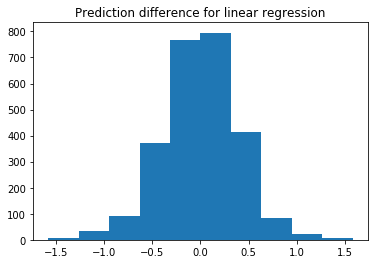

In [16]:
plt.title("Prediction difference for linear regression")
plt.hist(regression_diff)

In [17]:
baseline_diff = y_baseline_test - y_test

(array([  8.,  14.,  61., 225., 547., 801., 659., 242.,  30.,   3.]),
 array([-1.28271267, -1.04751267, -0.81231267, -0.57711267, -0.34191267,
        -0.10671267,  0.12848733,  0.36368733,  0.59888733,  0.83408733,
         1.06928733]),
 <a list of 10 Patch objects>)

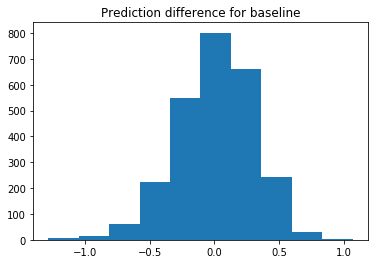

In [18]:
plt.title("Prediction difference for baseline")
plt.hist(baseline_diff)

### Test

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
freq = 355

In [21]:
X_freq = X[:, ::freq]
print_lr_scores(X_freq)

95% confindence interval:
r2_score: 0.97905 (+/- 0.00186)
MSE: 3.40701 (+/- 0.34720)
MAE: 1.42511 (+/- 0.04723)


In [22]:
X_freq.shape

(7848, 3)

In [23]:
from mpl_toolkits.mplot3d import axes3d

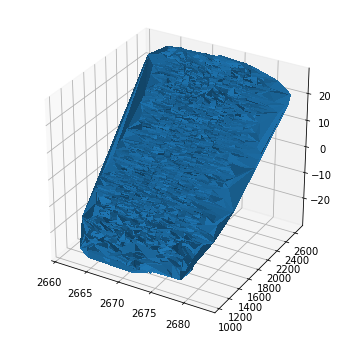

In [24]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(X_freq[:, 0], X_freq[:, 1], y, linewidth=0, antialiased=False)
plt.show()
# ax.plot_surface(, X_freq[:, 1], X_freq[:, 2])

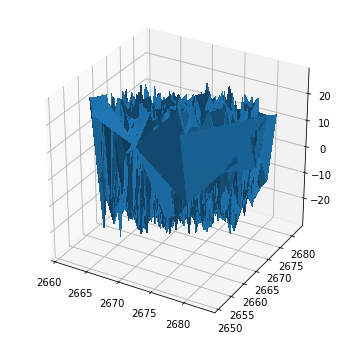

In [25]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(X_freq[:, 0], X_freq[:, 2], y, linewidth=0, antialiased=False)
plt.show()
# ax.plot_surface(, X_freq[:, 1], X_freq[:, 2])

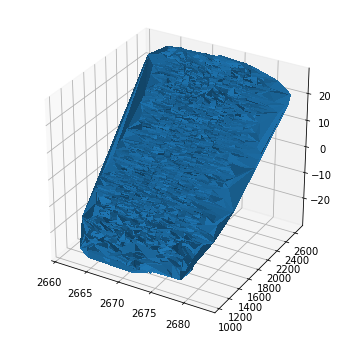

In [26]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(X_freq[:, 0], X_freq[:, 1], y, linewidth=0, antialiased=False)
plt.show()
# ax.plot_surface(, X_freq[:, 1], X_freq[:, 2])

In [27]:
from sklearn.manifold import TSNE

In [28]:
X_freq.shape

(7848, 3)

In [29]:
y.shape

(7848,)

In [30]:
data = np.zeros(shape=(X_freq.shape[0], X_freq.shape[1] + 1))

In [31]:
data.shape

(7848, 4)

In [32]:
data[:, :3] = X_freq.copy()

In [33]:
data[:, 3] = y.copy()

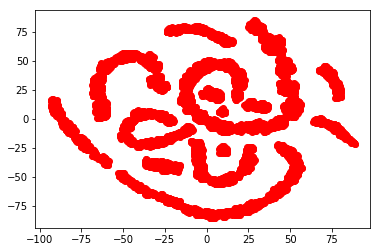

In [ ]:
# data_embedded = TSNE(n_components=2).fit_transform(data)


# plt.scatter([x for x, y in data_embedded], [y for x, y in data_embedded], color='r')
# plt.show()

In [ ]:
# freq = 5
# X_freq = X[:, ::freq]
# poly = PolynomialFeatures(2)
# X_freq = poly.fit_transform(X_freq)
# print_lr_scores(X_freq)

### Experiments with signal frequency

In [39]:
def plot_errors(frequency_values, start_point=355):
    plt.rcParams["figure.figsize"] = [12, 8]
    
    r2_scores = []
    mse_scores = []
    mae_scores = []

    for freq in tqdm.tqdm(frequency_values):
        X_freq = np.concatenate([X[:, start_point::-freq], X[:, start_point::freq]], axis=1)

        reg = LinearRegression()

        scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
        scores = cross_validate(reg, X_freq, y, scoring=scoring, cv=5)

        r2_scores.append(scores['test_r2'].mean())
        mse_scores.append(scores['test_neg_mean_squared_error'].mean())
        mae_scores.append(scores['test_neg_mean_absolute_error'].mean())
        
    plt.title("R2 score dependency on number of samples")
    plt.plot(frequency_values, r2_scores)
    plt.show()
    
    plt.title("MSE and MAE dependencies on number of samples")
    plt.plot(frequency_values, mse_scores)
    plt.plot(frequency_values, mae_scores)
    plt.legend(('MSE', 'MAE'),
               loc='lower left')
    plt.show()

100%|██████████| 998/998 [00:49<00:00, 20.17it/s]


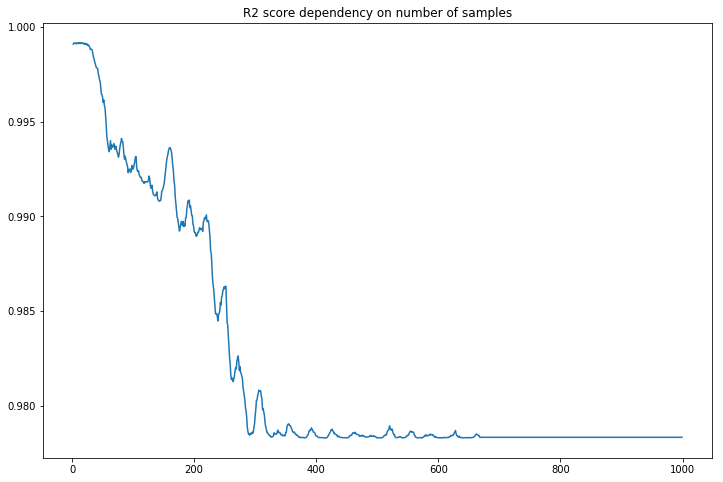

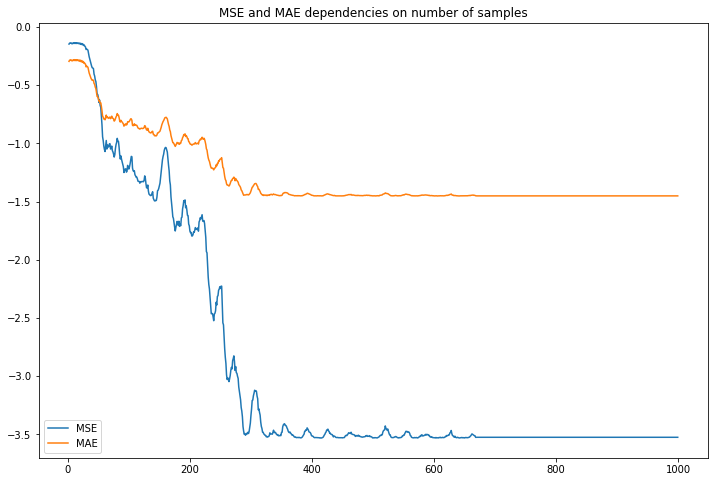

In [40]:
frequency_values = range(2, 1000)

plot_errors(frequency_values)

100%|██████████| 98/98 [00:18<00:00,  5.41it/s]


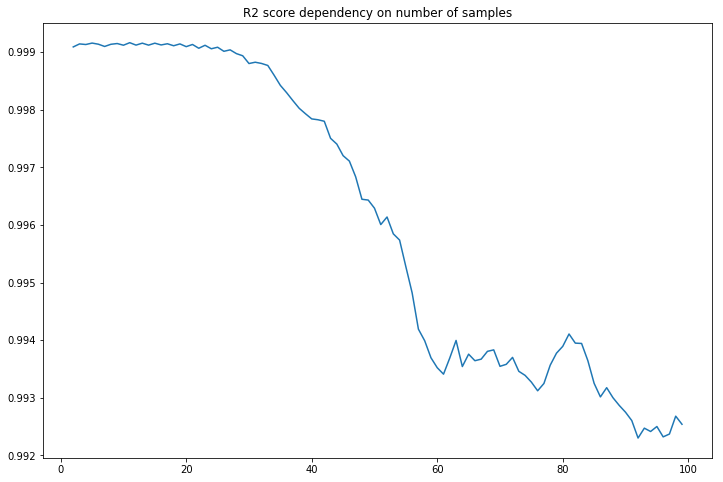

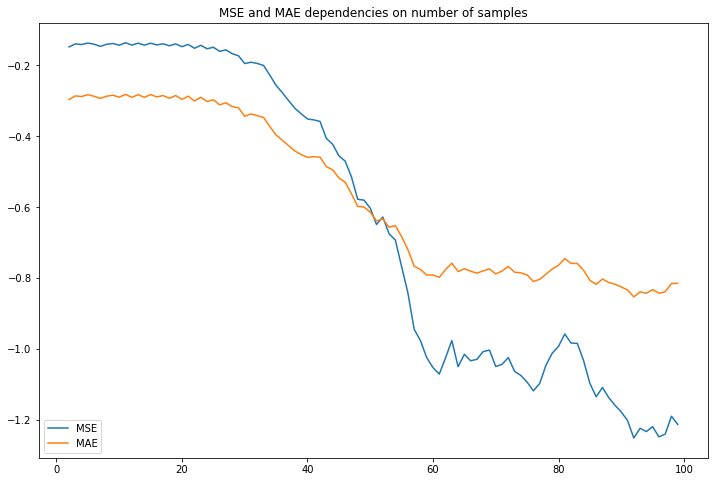

In [42]:
frequency_values = range(2, 100)

plot_errors(frequency_values)

#### As we may see, if we take freq = 20, we significantly reduce the size of our data and have the same errors rate

### Trying other models

In [44]:
freq = 20
start_point = 355

X = np.concatenate([X[:, start_point::-freq], X[:, start_point::freq]], axis=1)

In [45]:
X.shape

(7848, 52)

In [46]:
poly = PolynomialFeatures(2)
X_polynomial = poly.fit_transform(X)

In [49]:
X_polynomial.shape

(7848, 1431)

In [58]:
print("Linear regresssion metrics:")
print_lr_scores(X)

Linear regresssion metrics:
95% confindence interval:
r2_score: 0.99910 (+/- 0.00006)
MSE: 0.14703 (+/- 0.01111)
MAE: 0.29564 (+/- 0.01264)


In [51]:
print("Polynomial linear regression metrics:")
print_lr_scores(X_polynomial)

Polynomial linear regression metrics
95% confindence interval:
r2_score: 0.99961 (+/- 0.00002)
MSE: 0.06373 (+/- 0.00395)
MAE: 0.19767 (+/- 0.00591)


In [53]:
print("Baseline metrics:")
print("r2_score:", r2_score(y, y_baseline))
print("MSE:", mean_squared_error(y, y_baseline))
print("MAE:", mean_absolute_error(y, y_baseline))

Baseline metrics:
r2_score: 0.9994485733281531
MSE: 0.08974125778045815
MAE: 0.23497220510936273


###### Linear regression provides worse result than the baseline solution, but we can beat the baseline solution with adding polynomial features

### Huber Regressor

In [55]:
from sklearn.linear_model import HuberRegressor

In [59]:
huber = HuberRegressor()

In [60]:
print_lr_scores(X, huber)

95% confindence interval:
r2_score: 0.99906 (+/- 0.00008)
MSE: 0.15273 (+/- 0.01377)
MAE: 0.30145 (+/- 0.01415)


In [61]:
print_lr_scores(X_polynomial, huber)

95% confindence interval:
r2_score: 0.99941 (+/- 0.00004)
MSE: 0.09552 (+/- 0.00915)
MAE: 0.23993 (+/- 0.01064)


### Ridge linear regression

In [63]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5)

In [64]:
print_lr_scores(X, ridge_reg)

95% confindence interval:
r2_score: 0.99910 (+/- 0.00006)
MSE: 0.14706 (+/- 0.01099)
MAE: 0.29566 (+/- 0.01244)


In [65]:
print_lr_scores(X_polynomial, ridge_reg)

95% confindence interval:
r2_score: 0.99961 (+/- 0.00002)
MSE: 0.06302 (+/- 0.00398)
MAE: 0.19658 (+/- 0.00580)


### Lasso linear regression

In [67]:
lasso_reg = linear_model.Lasso(alpha=0.1)

In [68]:
print_lr_scores(X, lasso_reg)

/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

95% confindence interval:
r2_score: 0.99908 (+/- 0.00007)
MSE: 0.15038 (+/- 0.01211)
MAE: 0.29950 (+/- 0.01433)


/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [69]:
print_lr_scores(X_polynomial, lasso_reg)

/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

95% confindence interval:
r2_score: 0.99956 (+/- 0.00001)
MSE: 0.07211 (+/- 0.00367)
MAE: 0.20930 (+/- 0.00561)


/home/pavel/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Decision trees

In [71]:
from sklearn import tree

dt_reg = tree.DecisionTreeRegressor()

In [72]:
print_lr_scores(X, dt_reg)

95% confindence interval:
r2_score: 0.99883 (+/- 0.00022)
MSE: 0.18990 (+/- 0.03040)
MAE: 0.33788 (+/- 0.01909)


In [73]:
print_lr_scores(X_polynomial, dt_reg)

95% confindence interval:
r2_score: 0.99891 (+/- 0.00009)
MSE: 0.17727 (+/- 0.00650)
MAE: 0.32520 (+/- 0.00646)


### SVM

In [90]:
from sklearn import svm

In [91]:
svm_reg = svm.SVR()

In [92]:
print_lr_scores(X, svm_reg)

95% confindence interval:
r2_score: -0.00096 (+/- 0.00135)
MSE: 162.82265 (+/- 9.49223)
MAE: 10.90944 (+/- 0.37305)


In [94]:
print_lr_scores(X_polynomial, svm_reg)

95% confindence interval:
r2_score: -0.00096 (+/- 0.00135)
MSE: 162.82272 (+/- 9.49217)
MAE: 10.90945 (+/- 0.37305)


### Passive aggresive

In [96]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [98]:
pa_reg = PassiveAggressiveRegressor(max_iter=1000, random_state=0, tol=1e-3)

In [99]:
print_lr_scores(X, pa_reg)

95% confindence interval:
r2_score: 0.99857 (+/- 0.00083)
MSE: 0.23190 (+/- 0.12136)
MAE: 0.36958 (+/- 0.12428)


In [100]:
print_lr_scores(X_polynomial, pa_reg)

95% confindence interval:
r2_score: 0.99844 (+/- 0.00106)
MSE: 0.25614 (+/- 0.18986)
MAE: 0.40404 (+/- 0.16825)


### Xgboost

In [104]:
import xgboost as xgb

In [106]:
xgb_reg = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [107]:
print_lr_scores(X, xgb_reg)

[21:59:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:59:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
95% confindence interval:
r2_score: 0.99939 (+/- 0.00005)
MSE: 0.09974 (+/- 0.00859)
MAE: 0.24625 (+/- 0.00999)


In [108]:
print_lr_scores(X_polynomial, xgb_reg)

[21:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
95% confindence interval:
r2_score: 0.99939 (+/- 0.00006)
MSE: 0.10001 (+/- 0.01135)
MAE: 0.24677 (+/- 0.01115)


### Impuls graphs for different signal frequencies

In [38]:
    plt.rcParams["figure.figsize"] = [6, 4]

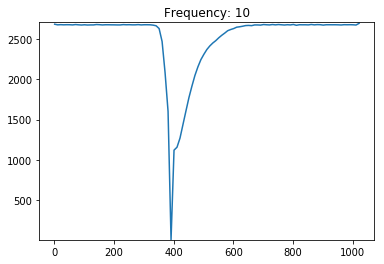

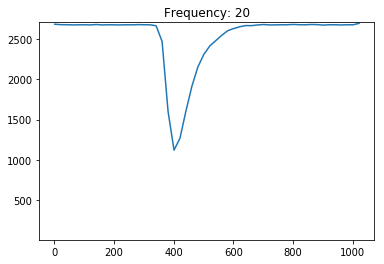

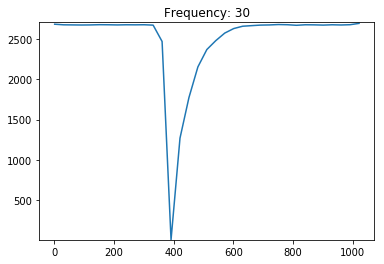

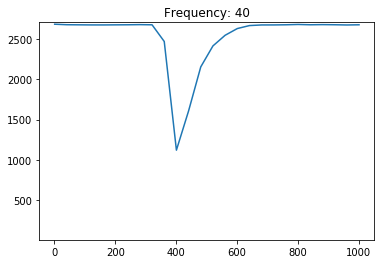

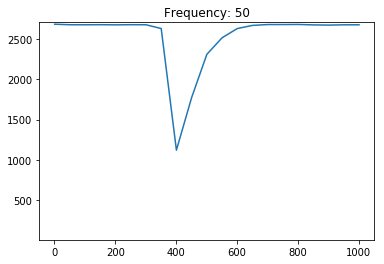

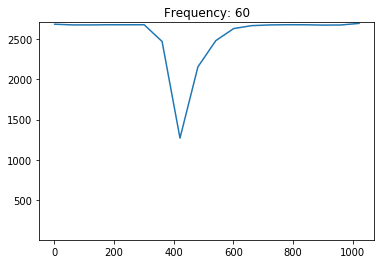

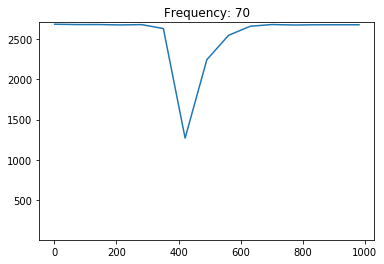

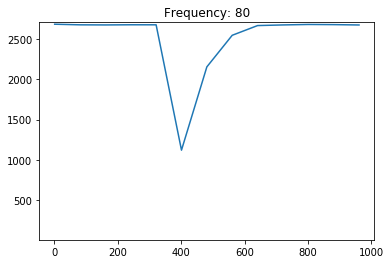

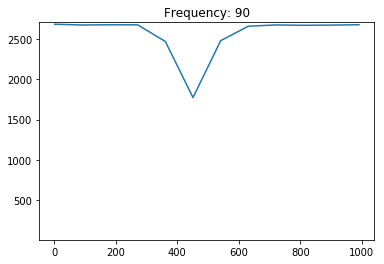

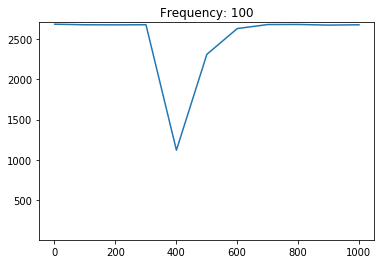

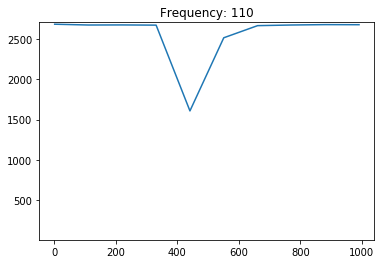

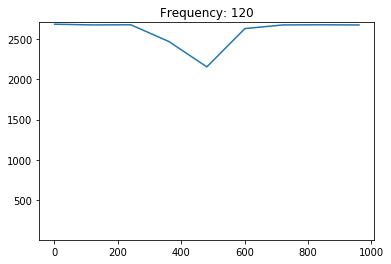

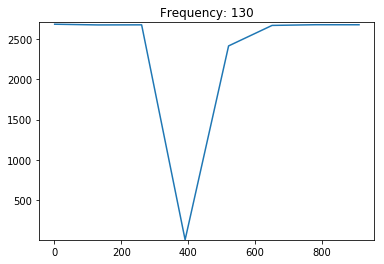

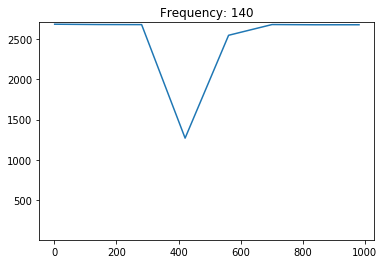

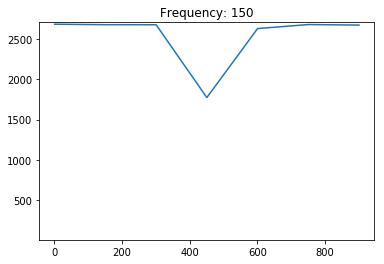

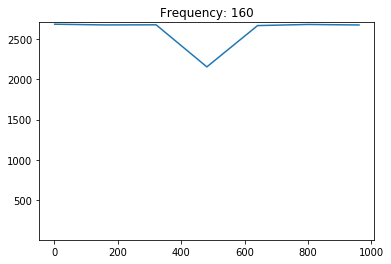

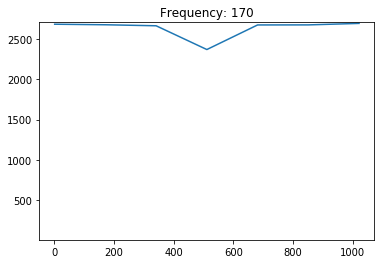

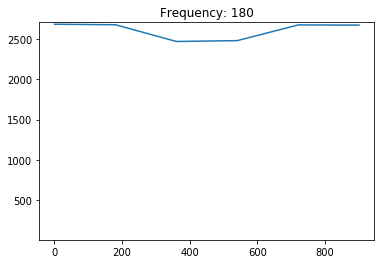

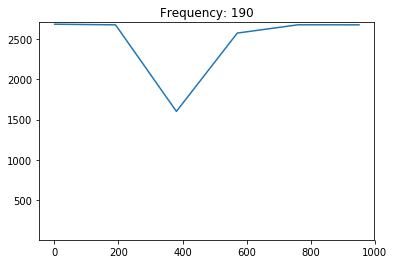

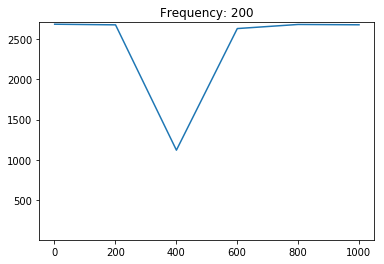

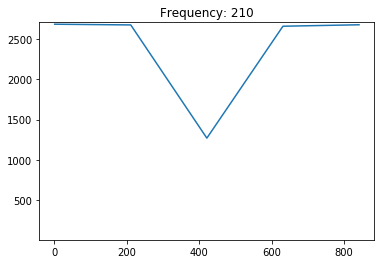

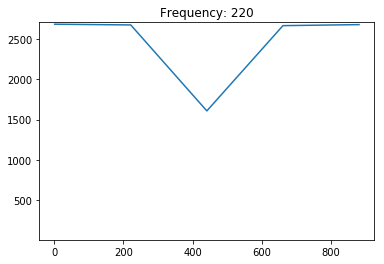

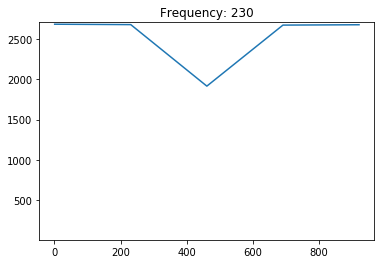

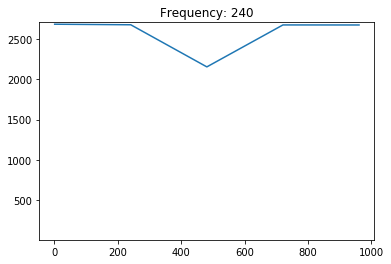

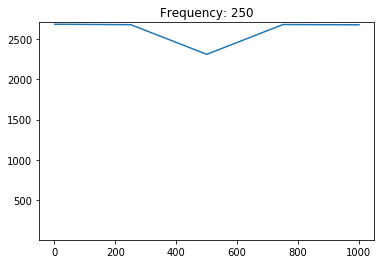

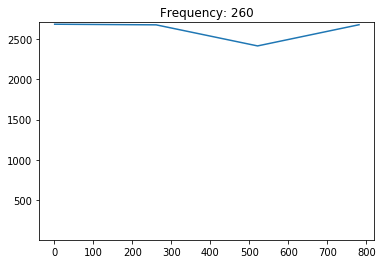

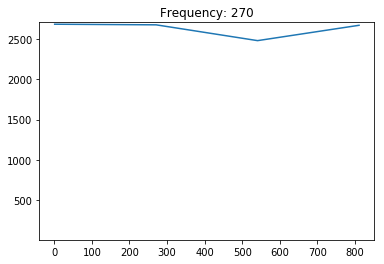

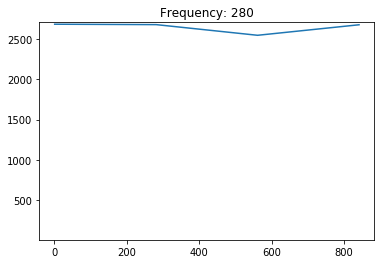

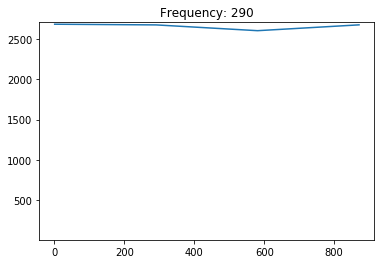

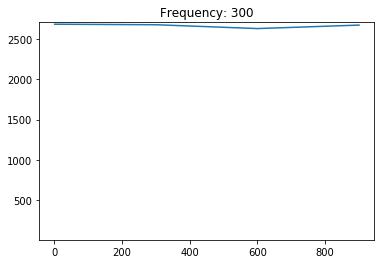

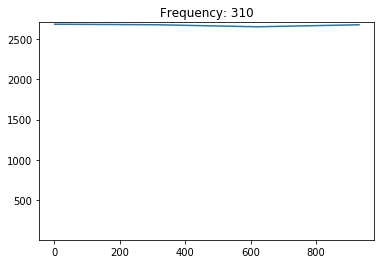

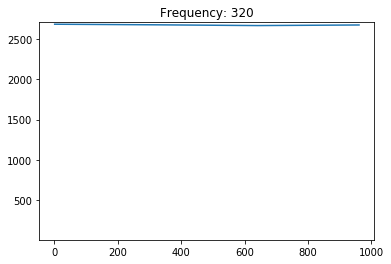

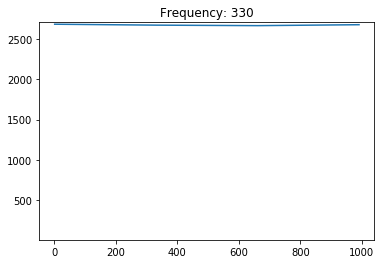

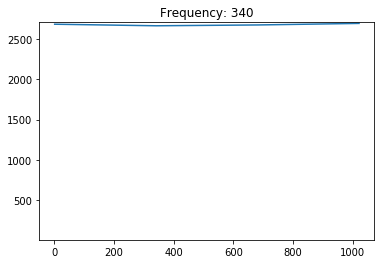

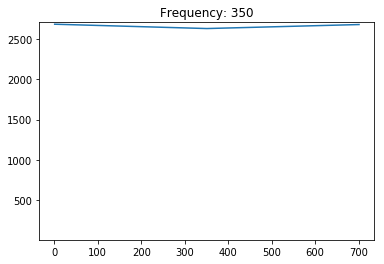

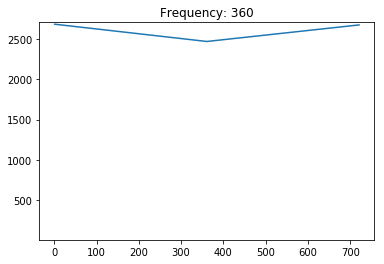

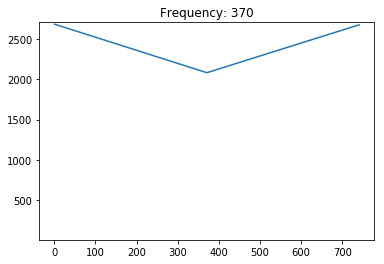

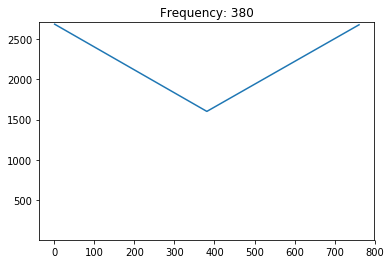

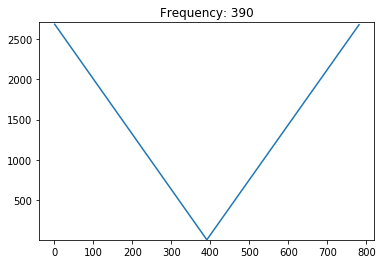

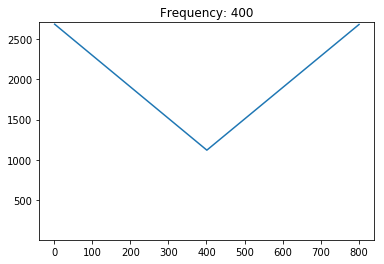

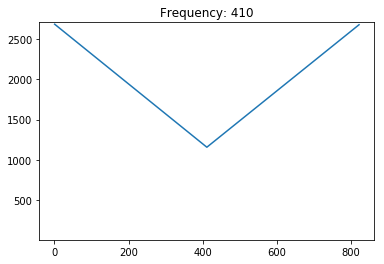

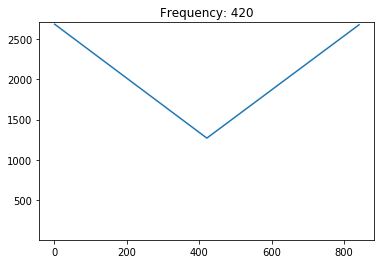

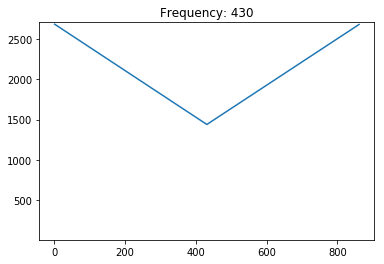

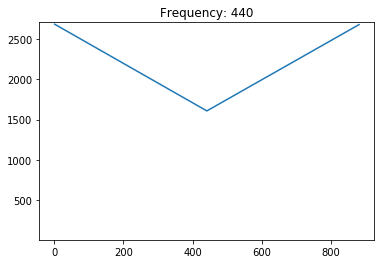

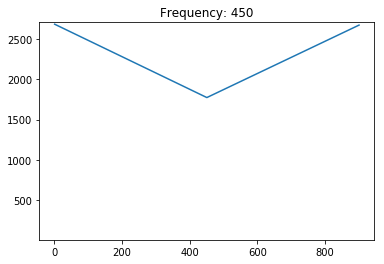

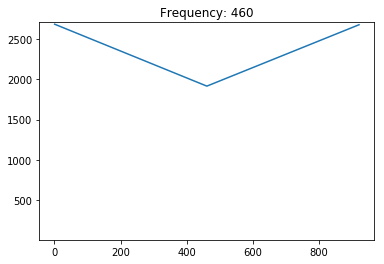

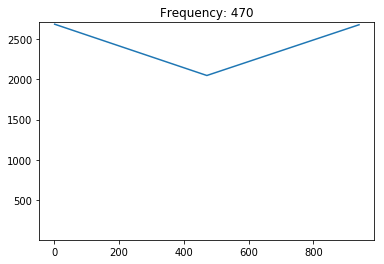

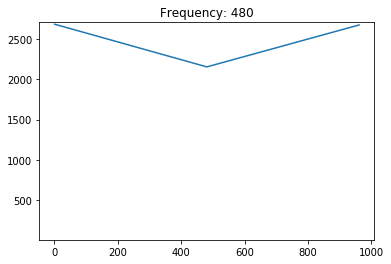

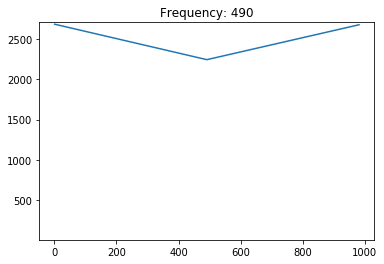

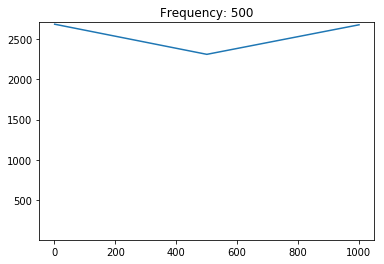

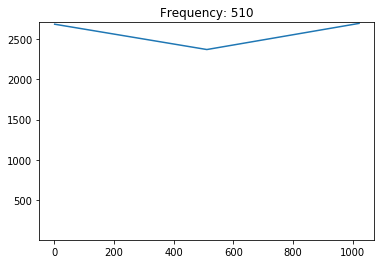

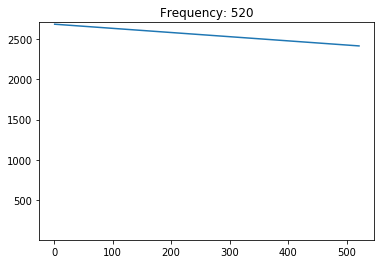

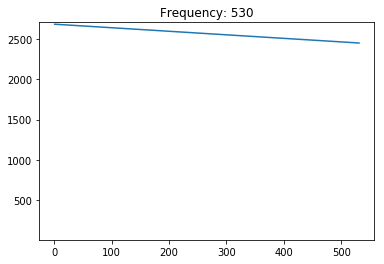

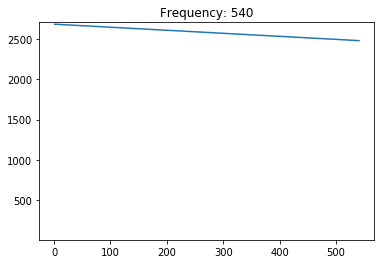

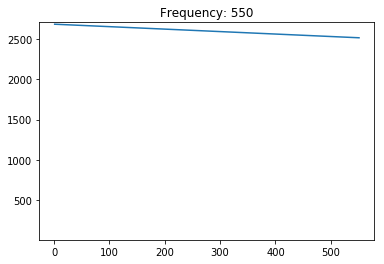

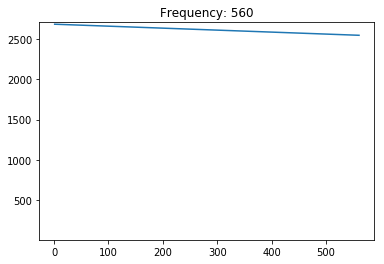

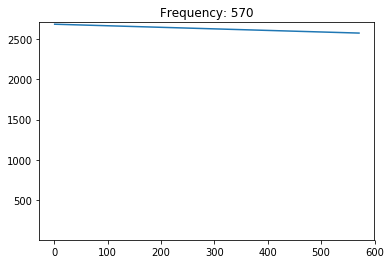

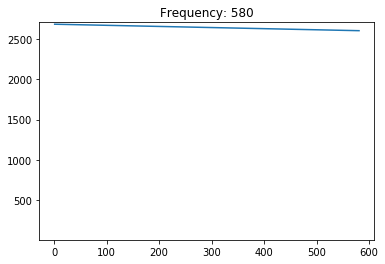

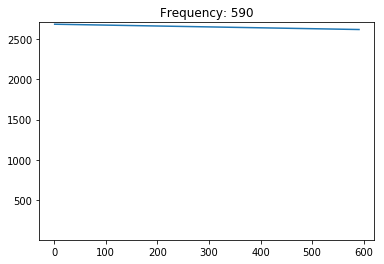

In [39]:
for freq in range(10, 600, 10):
    x = X[0, ::freq]

    plt.title("Frequency: " + str(freq))
    plt.ylim(np.min(X), np.max(X))
    plt.plot(range(1, len(X[0]), freq), x)
    plt.show()

### Graphs

(array([ 33., 177., 330., 361., 359., 361., 330., 345., 229.,  65.]),
 array([-29.70791514, -23.98461514, -18.26131514, -12.53801514,
         -6.81471514,  -1.09141514,   4.63188486,  10.35518486,
         16.07848486,  21.80178486,  27.52508486]),
 <a list of 10 Patch objects>)

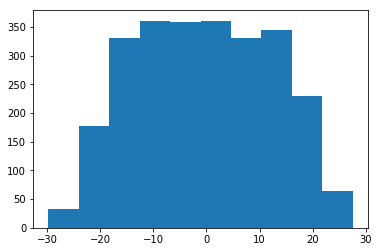

In [58]:
plt.hist(y_test)

In [59]:
def plot_experiment(num):
    experiment = X[num]
    plt.plot(experiment)
    plt.show()

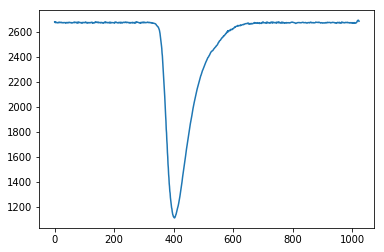

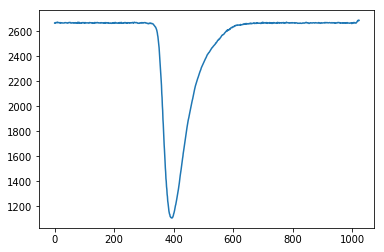

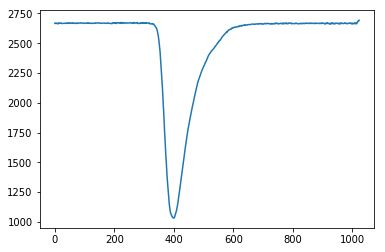

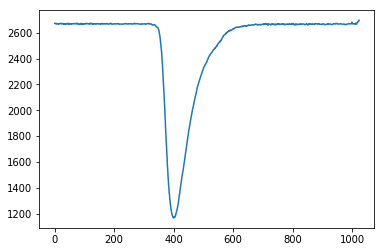

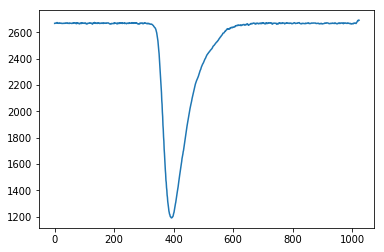

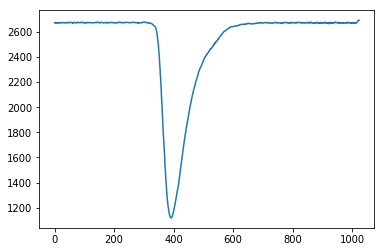

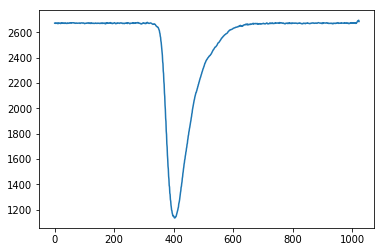

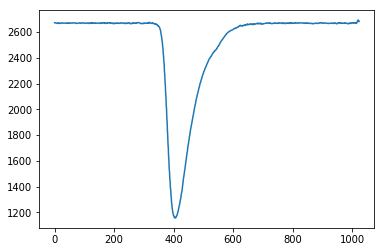

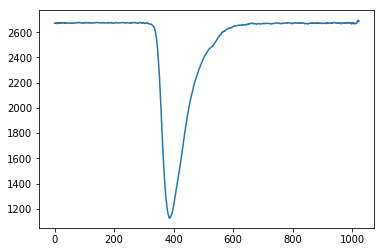

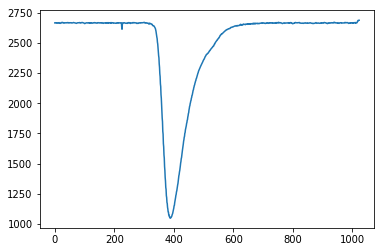

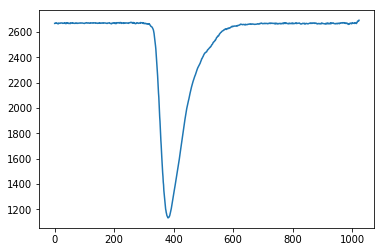

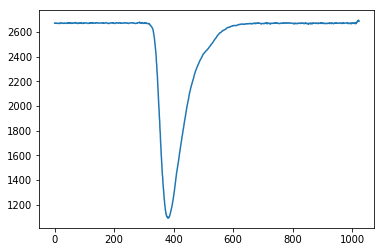

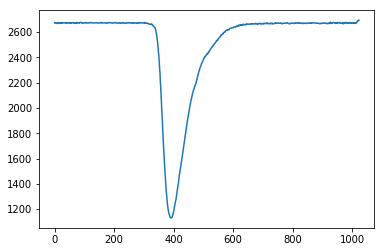

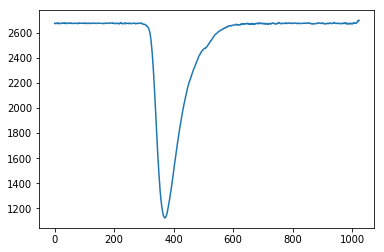

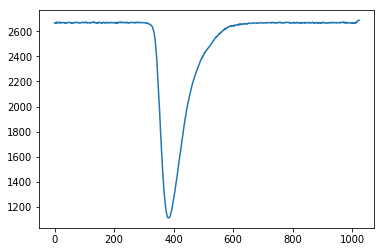

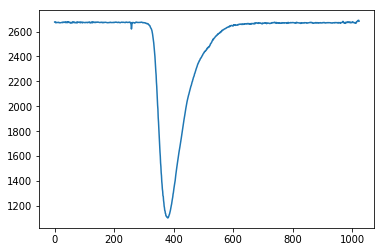

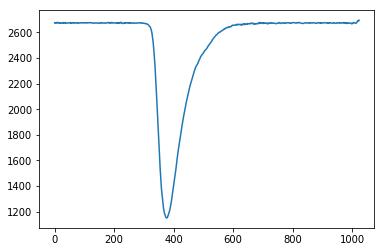

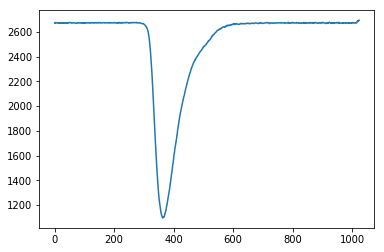

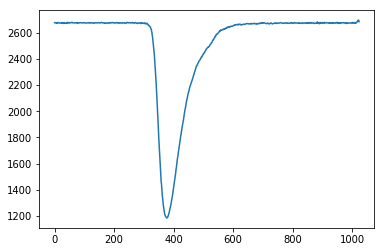

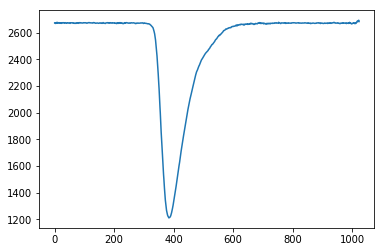

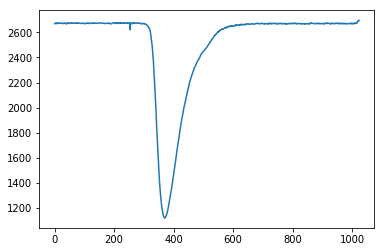

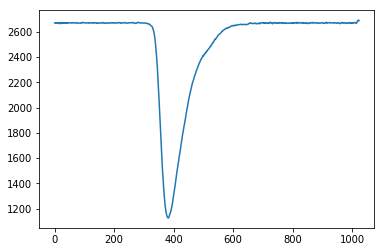

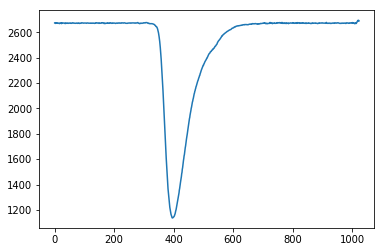

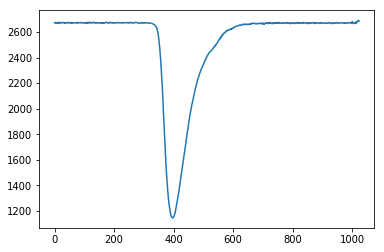

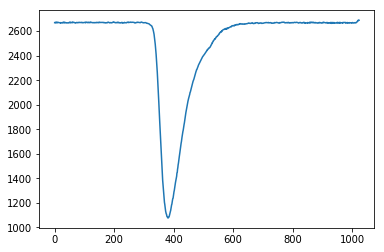

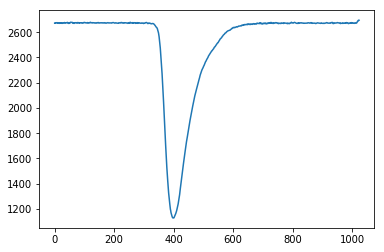

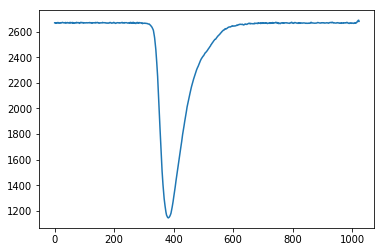

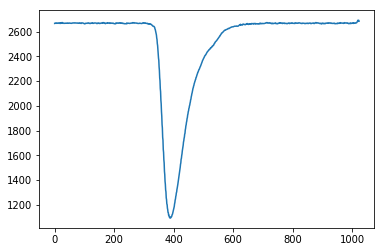

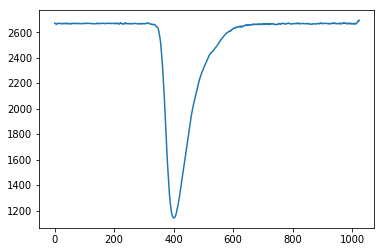

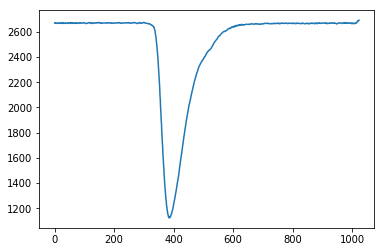

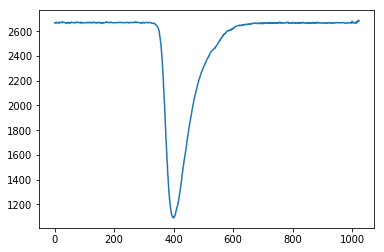

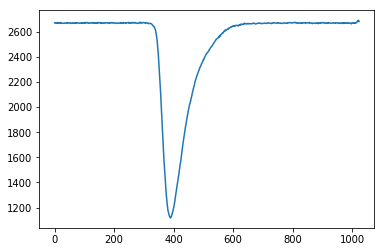

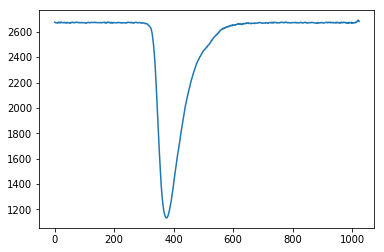

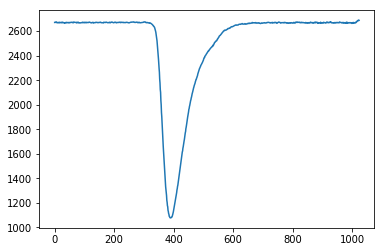

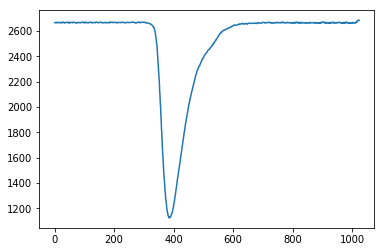

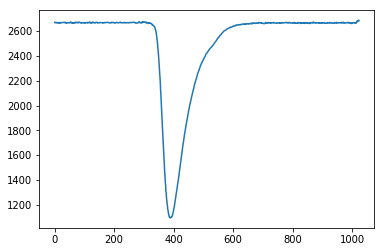

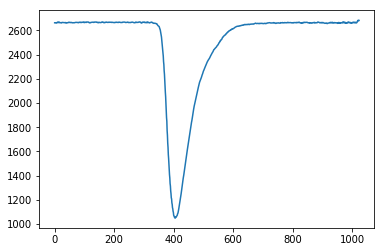

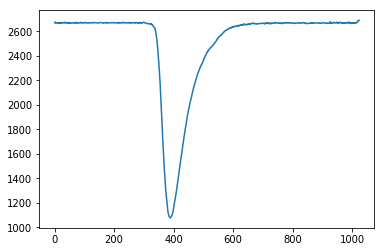

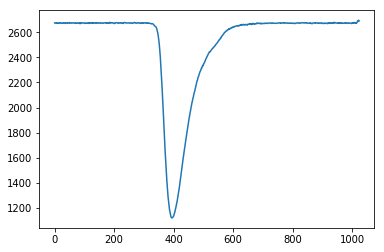

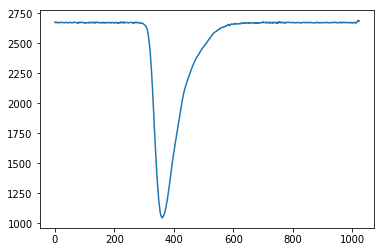

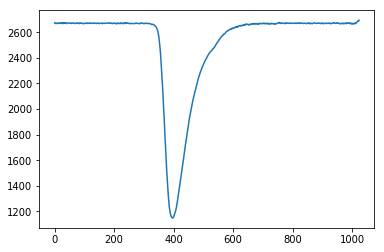

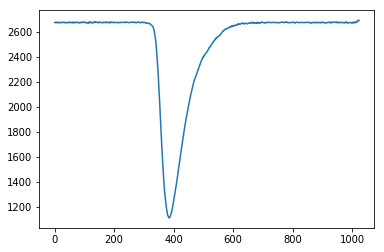

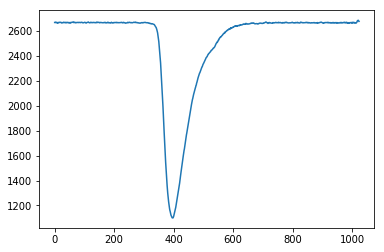

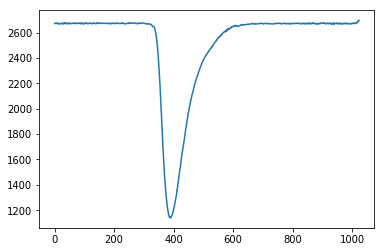

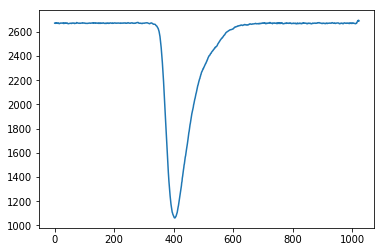

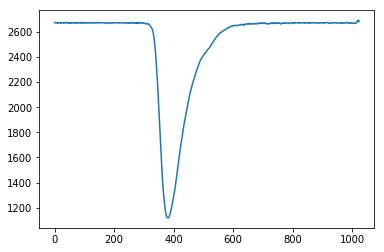

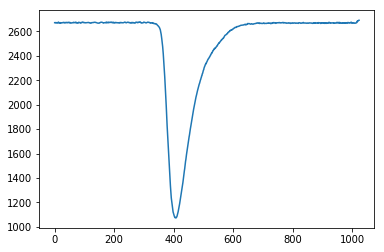

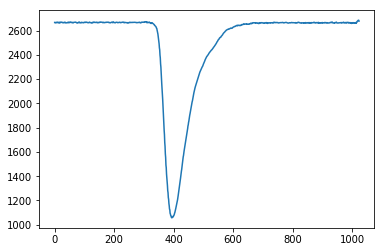

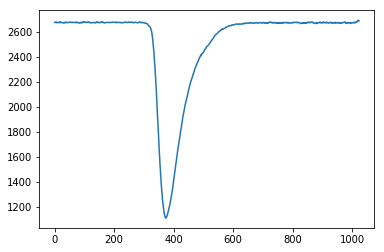

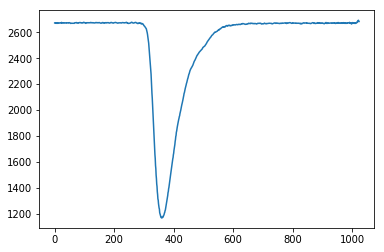

In [60]:
for i in range(0, 5000, 100):
    plot_experiment(i)